Found 470 images belonging to 10 classes.
Found 130 images belonging to 10 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                      

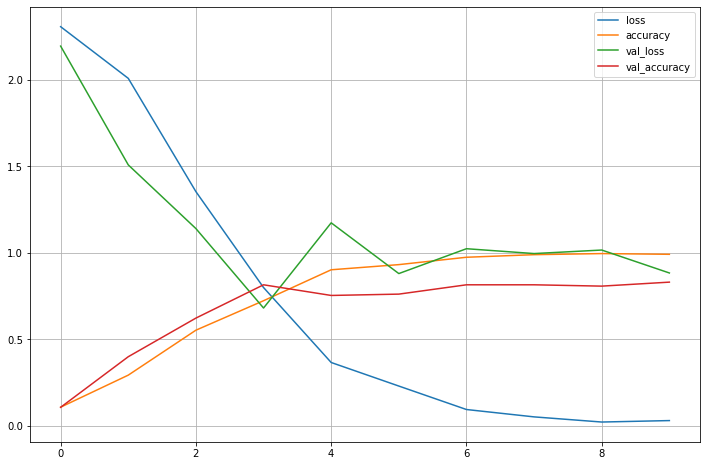

In [1]:
# 사용할 패키지 불러오기
import time

import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

start = time.time()

## 형태: 손글씨 인식
## 입력: 손으로 쓴 0~8 숫자
## 출력: 0~9로 출력될 확률

# 랜덤시드 고정시키기
np.random.seed(3) #매번 실행시마다 결과가 달라지지 않도록 랜덤 시드를 명시적으로 지정

# 1. 데이터 생성하기
train_datagen = ImageDataGenerator(rescale=1./255) #케라스에서 이미지 파일을 쉽게 학습시킬 수 있도록 imageDataGenerator 클래스를 제공

train_generator = train_datagen.flow_from_directory(
        'train', #train 폴더를 생성한 위치 - 이미지 경로 지정
        target_size=(28, 28), # 패치 크기를 지정
        batch_size=10, # 배치 크기를 지정
        class_mode='categorical') #2D one-hot 부호화된 라벨이 반환

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        'test',
        target_size=(28, 28),
        batch_size=10,
        class_mode='categorical')

# 2. 모델 구성하기
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,3)))  # 필터의 수 64개, 필터 크기 3 X 3, 활성화 함수 'relu', 입력 이미지 크기 28 * 28, 입력 이미지 채널 3( 흑백일 경우 채널1, 컬러일 경우 채널 3)
model.add(Conv2D(64, (3, 3), activation='relu')) #컨볼리션 레이어 : 필터 크기 3*3, 필터 수 64개, 활성화 함수 'relu'
model.add(MaxPooling2D(pool_size=(2, 2))) #맥스 풀링 레이어 : 풀 크기  2 * 2
model.add(Conv2D(128, (3, 3), activation='relu')) #컨볼리션 레이어 : 필터 크기 3*3, 필터 수 128개, 활성화 함수 'relu'
model.add(MaxPooling2D(pool_size=(2, 2))) #맥스 풀링 레이어 : 풀 크기  2 * 2
model.add(Flatten()) #플래튼 레이어
model.add(Dense(256, activation='relu')) #댄스 레이어 : 출력 뉴런수 256개, 활성화 함수: 'relu'
model.add(Dense(10, activation='softmax')) #댄스 레이어: 출력 뉴런수 10개, 활성화 함수 'softmax'

model.summary()

# 3. 모델 학습과정 설정하기
#loss는 현재 가중치 세트를 평가하는데 사용한 손실 함수 , optimizer은 최적화 알고리즘, metrics는 평가 척도를 나타냄
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy']) #adam 사용하였음

# 4. 모델 학습시키기
hist = model.fit(
        train_generator, #훈련 데이터셋을 제공할 제너레이터를 지정
        steps_per_epoch=47, #총 학습 데이터/ 배치 사이즈 , 한 epoch에 사용한 스텝 수 지정
        epochs=10, # 전체 훈련 데이터셋에 대해 학습 반복 횟수 지정, 8번 반복해 학습
        validation_data=test_generator, #검증데이터셋을 제공할 제네레이터를 지정
        validation_steps=13) #한 epoch 종료 시 마다 검증할 때 사용되는 검증 스텝수, 총 검증 샘플/배치 사이즈

# 5. 모델 평가하기
print("-- Evaluate --")
scores = model.evaluate(test_generator, steps=None)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) # 정확도 출력, 반올림
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])



# 6. 모델 사용하기
print("-- Predict --")
output = model.predict(test_generator, steps=None)
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
print(test_generator.class_indices)
print(output) #클래스별 확률 벡터를 출력

# print(test_generator.filenames)

end = time.time()
total_time = end - start

print(f"{total_time:.5f} sec for dealing with {3150} data")
print("cropping per 1 image : ", int(total_time // 3150), "sec")


plot_target = ['loss' , 'accuracy', 'val_loss', 'val_accuracy']
plt.figure(figsize=(12, 8))

for each in plot_target:
    plt.plot(hist.history[each], label = each)
plt.legend()
plt.grid()
plt.show()


